#Assignment 1:
Test if the distribution of ages is the same for

1) Male and female riders

2) Day and night riders

Use 3 tests: KS, Pearson's, Spearman's

$1. Test the distribution of age between male and female riders

In [1]:
#import statements
%pylab inline 
import pylab as pl
import numpy as np 
import pandas as pd
import scipy.stats
import seaborn as sns
import os 
import json
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in Citibike dataset from January 2015
df=pd.read_csv('201501-citibike-tripdata.csv')

#By gender 

In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

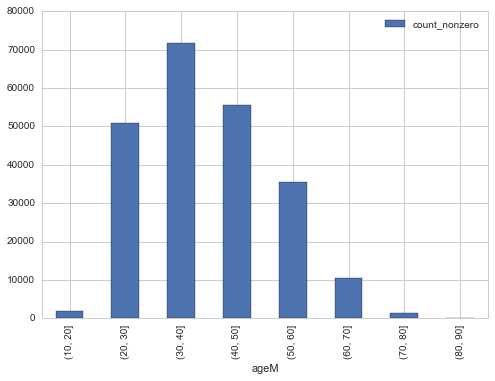

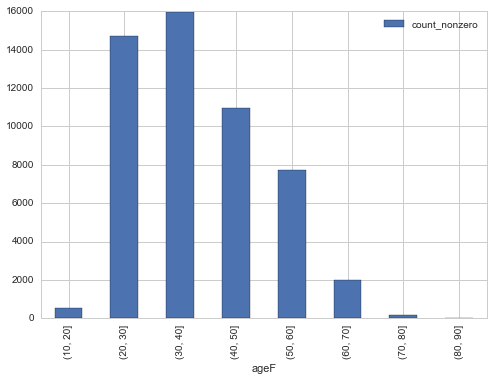

In [4]:
#lets splot age in 10 year bins
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


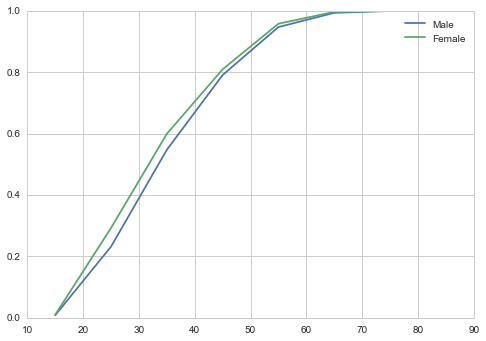

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

diff = np.abs(csM / csM.max()-csF / csF.max())

print diff

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Male")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Female")

pl.legend()

#Kolmogorov-Smirnov Test

In [6]:
#Manually calculate K-S test
d_statistic = max(diff['count_nonzero'])
print d_statistic

0.0609376938212


In [7]:
n1 = sum(df.ageM>0)
n2 = sum(df.ageF>0)
alpha=0.05 #my chosen significance level
c_alpha = 1.36 #value taken from the critical values tablel
d_critical = c_alpha*sqrt((n1+n2)/float(n1*n2))
print d_critical

0.00660502963361


In [8]:
if d_statistic<d_critical: 
    print "The d_stat found above is smaller than the critical value d_critical at 0.05 significance level. So the null hypothesis is rejected."
else: 
    print "The d_stat found above is greater than the critical value d_critical at 0.05 significance level. So the null hypothesis is not rejected."

The d_stat found above is greater than the critical value d_critical at 0.05 significance level. So the null hypothesis is not rejected.


In [9]:
#KS test to compare 2 samples
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.61519793242561782, 0.0)


In [10]:
#Ks 2 sample result is d-statistic=0.61519793242561782 and pvalue=0.0.
#Because both the d-statistic is larger than the critical value at 0.05 level 
#and the pvalue is smaller than level 0.05
#Therefore, the null hypothesis that the distributions of the two samples are similar can be rejected. 

The value returned by scipy and the one that I manually calculated turn out to be different. 
One possible reason may be that the value generated by scipy does not present the KS statistic correctly. Also, because the KS statistic is lower than any critical value, the null hypothesis of both samples belonging to the same distribution cannot be rejected. 

#Pearson's test for correlation

In [11]:
pearson = scipy.stats.pearsonr(df.ageM, df.ageF)
print pearson

(nan, 1.0)


From the result above, I conclude that there is no correlation. Thus, the non correlation hypothesis cannot be rejected with a high p-value. 

#Spearman's test for correlation

In [12]:
spearman = scipy.stats.spearmanr(df.ageM, df.ageF)
print spearman

(-0.43552302983795976, 0.0)


There is little correlation between female and male age. 

#By day vs night

In [13]:
df['date'] = pd.to_datetime(df['starttime'])

In [20]:
#We would assume that for the month of January, the daytime would be from 6am to 6pm  
#and the nighttime would be from 6pm to 6am of the next day. 
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour>=6) & (df['date'].dt.hour<18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour<6)|(df['date'].dt.hour>=18)]

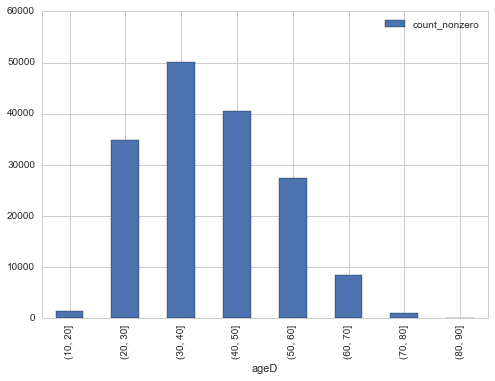

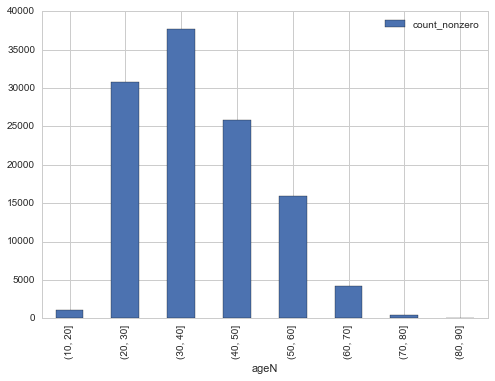

In [15]:
#lets splot time in 10 year bins
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.000186
(20, 30]       0.053580
(30, 40]       0.073066
(40, 50]       0.047691
(50, 60]       0.018350
(60, 70]       0.003182
(70, 80]       0.000060
(80, 90]       0.000000


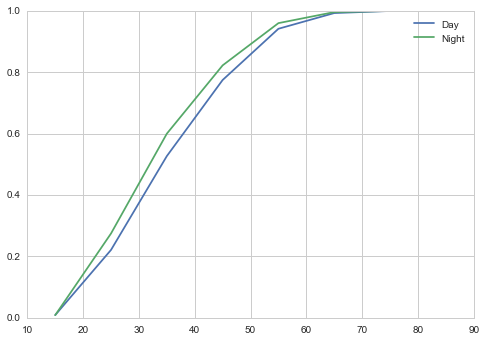

In [16]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()
csF=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Day")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Night")

pl.legend()

#Kolmogorov-Smirnov Test

In [21]:
ks=scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks

(0.41810248220989527, 0.0)


The hypothesis is rejected

#Pearson's test for correlation

In [18]:
pearson = scipy.stats.pearsonr(df.ageD, df.ageN)
print pearson

(nan, 1.0)


#Spearman's test for correlation

In [19]:
spearman = scipy.stats.spearmanr(df.ageD, df.ageN)
print spearman

(-0.69797810983626341, 0.0)
